# Testing Ground For Project 1

## Input

* N_TOWNS N_PAIRS
* PAIR1 PAIR2
* PAIR3 PAIR4
* ETC

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from more_itertools import powerset
# import sys

# with open(sys.argv[1], 'r') as f:
#     contents = f.read()
# print(contents)

In [11]:
values = input().split()

n_towns = int(values[0])
n_pairs = int(values[1])

towns = list(range(n_towns))
pairs = list(range(n_pairs))

In [12]:
connections = []

for i in range(0, n_pairs):
  values = input().split()

  connections.append((int(values[0]), int(values[1])))

In [13]:
G = nx.Graph()
G.add_nodes_from(range(n_towns))
G.add_edges_from(connections, length = 1)

if not nx.is_connected(G):
  print("Not all towns are connected! You won't get reliable results.")

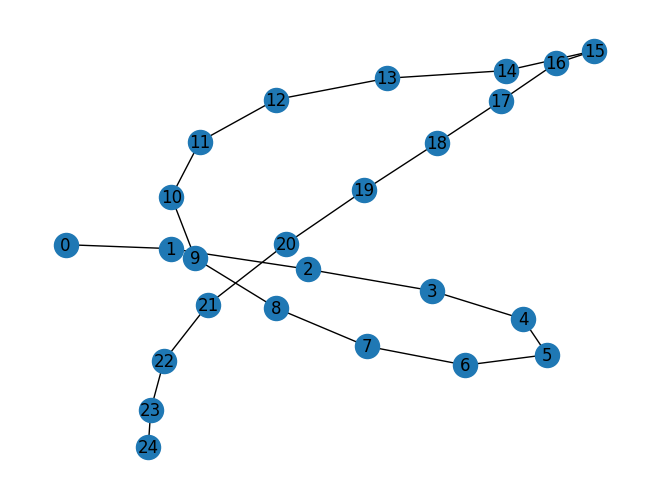

In [14]:
nx.draw(G, with_labels = True)

In [6]:
def find_valid_connections(Graph, n_town_pairs, n_towns, town_id):
  valid_connections = 0
  
  if n_towns == n_town_pairs:
    n_town_pairs -= 1

  # Check if pairs for one town are valid connections
  for i in range(n_town_pairs + 1):

    if i == town_id:
      continue
    
    is_edge = Graph.get_edge_data(town_id, i)
    length = nx.shortest_path_length(G, town_id, i)

    if (is_edge is not None) and (length == 1):
      valid_connections += 1
    # print(is_edge, length)

  return(valid_connections)

In [15]:
n_cnx = {}

for i in range(n_towns):

  town_connections = find_valid_connections(G, n_pairs, n_towns, i)
  n_cnx[i] = town_connections

print(n_cnx)
n_cnx_sort = sorted(n_cnx.items(), key=lambda x: x[1], reverse = True)
print(n_cnx_sort)

{0: 1, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 1}
[(1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (0, 1), (24, 1)]


In [16]:
subsets = list(powerset(towns))
nx.is_dominating_set(G, list(subsets[15]))

dom_sets = []

for i in range(1, len(subsets)):

  dom_set = nx.is_dominating_set(G, list(subsets[i]))

  if dom_set:
    dom_sets.append(subsets[i])

print(f"The number of stations needed is {len(dom_sets[0])}.\nTown IDs: {dom_sets[0][0]}, {dom_sets[0][1]}")

The number of stations needed is 9.
Town IDs: 0, 2
